In [1]:
#IMPORT ALL LIBRARIES & DEPENDENCIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as plticker
# IF MORE LIBRARIES NEED THEN IT WILL BE IMPORTED ON THAT PARTICULAR KERNAL

In [2]:
#LOAD DATA
world_cup=pd.read_csv(r"C:\Users\Soumadeep\Desktop\WORLD CUP PREDICTION\World Cup 2023 Dataset.csv")
results=pd.read_csv(r"C:\Users\Soumadeep\Desktop\WORLD CUP PREDICTION\ONE-DAY-MATCH-RESULTS(2016-23).csv")

In [3]:
world_cup.head()

,Team,Group,Previous \nappearances,Previous \r\ntitles,Previous\n finals,Previous\nsemifinals,Current \r rank
0,Australia,A,12,5,7,8,1
1,Pakisthan,A,12,1,2,6,2
2,India,A,12,2,3,7,3
3,New Zeland,A,12,0,2,8,4
4,England,A,12,1,4,6,5


In [4]:
results.head()

,DATE,TEAM_1,TEAM_2,WINNER,MARGIN,VENUE,CATEGORY_OF_WINNER
0,2-Jan-16,NewZeland,Sri Lanka,NaN,NaN,Nelson,No
1,2-Jan-16,Afganisthan,Zimbabwe,Zimbabwe,117 runs,Sharjah,Yes
2,4-Jan-16,Afganisthan,Zimbabwe,Zimbabwe,65 runs,Sharjah,Yes
3,5-Jan-16,NewZeland,Sri Lanka,NewZeland,36 runs,Mount Maunganui,Yes
4,6-Jan-16,Afganisthan,Zimbabwe,Afganisthan,2 wickets,Sharjah,Yes


In [5]:
#display the details of matches played by INDIA
df=results[(results['TEAM_1']=='India')|(results['TEAM_2']=='India')]
india=df.iloc[:]
india.head()

,DATE,TEAM_1,TEAM_2,WINNER,MARGIN,VENUE,CATEGORY_OF_WINNER
5,12-Jan-16,Australia,India,Australia,5 wickets,Perth,Yes
6,15-Jan-16,Australia,India,Australia,7 wickets,Brisbane,Yes
7,17-Jan-16,Australia,India,Australia,3 wickets,Melbourne,Yes
8,20-Jan-16,Australia,India,Australia,25 runs,Canberra,Yes
9,23-Jan-16,Australia,India,India,6 wickets,Sydney,Yes


In [6]:
#narrowing to team participating in the world cup
world_cup_teams=['Australia','Pakistan','India','NewZeland','England','South Africa','Bangladesh','Afganisthan','Sri Lanka','Netherlands']
df_teams_1=results[results['TEAM_1'].isin(world_cup_teams)]
df_teams_2=results[results['TEAM_2'].isin(world_cup_teams)]
df_teams=pd.concat((df_teams_1,df_teams_2))
df_teams.drop_duplicates()
df_teams.count()

DATE                  1078
TEAM_1                1078
TEAM_2                1078
WINNER                1004
MARGIN                1000
VENUE                 1078
CATEGORY_OF_WINNER    1078
dtype: int64

In [7]:
df_teams.head()

,DATE,TEAM_1,TEAM_2,WINNER,MARGIN,VENUE,CATEGORY_OF_WINNER
0,2-Jan-16,NewZeland,Sri Lanka,NaN,NaN,Nelson,No
1,2-Jan-16,Afganisthan,Zimbabwe,Zimbabwe,117 runs,Sharjah,Yes
2,4-Jan-16,Afganisthan,Zimbabwe,Zimbabwe,65 runs,Sharjah,Yes
3,5-Jan-16,NewZeland,Sri Lanka,NewZeland,36 runs,Mount Maunganui,Yes
4,6-Jan-16,Afganisthan,Zimbabwe,Afganisthan,2 wickets,Sharjah,Yes


In [8]:
#dropping Coloumns That will not affect Match Outcomes
df_teams_2016=df_teams.drop(['DATE','MARGIN','VENUE','WINNER'],axis=1)
df_teams_2016.head()

,TEAM_1,TEAM_2,CATEGORY_OF_WINNER
0,NewZeland,Sri Lanka,No
1,Afganisthan,Zimbabwe,Yes
2,Afganisthan,Zimbabwe,Yes
3,NewZeland,Sri Lanka,Yes
4,Afganisthan,Zimbabwe,Yes


In [9]:
#Feature Engineering
#building the Model
#the prediction label: The winning_team coloumn will show '1' if TEAM_1 was won & will show 2 if TEAM_2 was won
df_teams_2016=df_teams_2016.reset_index(drop=True)
df_teams_2016.loc[df_teams_2016.CATEGORY_OF_WINNER==df_teams_2016.TEAM_1,'winning_team']=1
df_teams_2016.loc[df_teams_2016.CATEGORY_OF_WINNER==df_teams_2016.TEAM_2,'winning_team']=2
df_teams_2016=df_teams_2016.drop(['winning_team'],axis=1)
df_teams_2016.head()

,TEAM_1,TEAM_2,CATEGORY_OF_WINNER
0,NewZeland,Sri Lanka,No
1,Afganisthan,Zimbabwe,Yes
2,Afganisthan,Zimbabwe,Yes
3,NewZeland,Sri Lanka,Yes
4,Afganisthan,Zimbabwe,Yes


In [10]:
#CONVERT TEAM_1 & TEAM_2 FROM CATEGORICAL VARIABLES TO CONTINUOUS INPUTS
final=pd.get_dummies(df_teams_2016,prefix=['TEAM_1','TEAM_2'],columns=['TEAM_1','TEAM_2'])
final['CATEGORY_OF_WINNER'].replace(['No','Yes'],[3,2],inplace=True)
final.head(10)


,CATEGORY_OF_WINNER,TEAM_1_Afganisthan,TEAM_1_Australia,TEAM_1_Bangladesh,TEAM_1_England,TEAM_1_Hong Kong,TEAM_1_India,TEAM_1_Ireland,TEAM_1_Nepal,TEAM_1_Netherlands,...,TEAM_2_Oman,TEAM_2_Pakistan,TEAM_2_Scotland,TEAM_2_South Africa,TEAM_2_Sri Lanka,TEAM_2_UAE,TEAM_2_USA,TEAM_2_West Indies,TEAM_2_Zimbabwe,TEAM_2_england
0,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,2,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,2,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,2,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,2,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
#SEPERATE X & Y SETS
x=final.drop(['CATEGORY_OF_WINNER'],axis=1)
y=final['CATEGORY_OF_WINNER']

In [12]:
#SPLITTING TRAIN & TEST SET
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=18)

In [13]:
#LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
model_1=LogisticRegression()

In [14]:
model_1.fit(x_train,y_train)

LogisticRegression()

In [15]:
a1=model_1.score(x_train,y_train)
a2=model_1.score(x_test,y_test)
print('The Training Accuracy is:',a1*100)
print('The Testing Accuracy is:',a2*100)

The Training Accuracy is: 92.42857142857143
The Testing Accuracy is: 93.38624338624338


In [16]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

 
test_scores = []
train_scores = []

for i in range(1,20):

    knn = KNeighborsClassifier(i)
    knn.fit(x_train,y_train)
    
    train_scores.append(knn.score(x_train,y_train))
    test_scores.append(knn.score(x_test,y_test))

In [17]:
## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 92.42857142857143 % and k = [2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


In [18]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 93.38624338624338 % and k = [4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


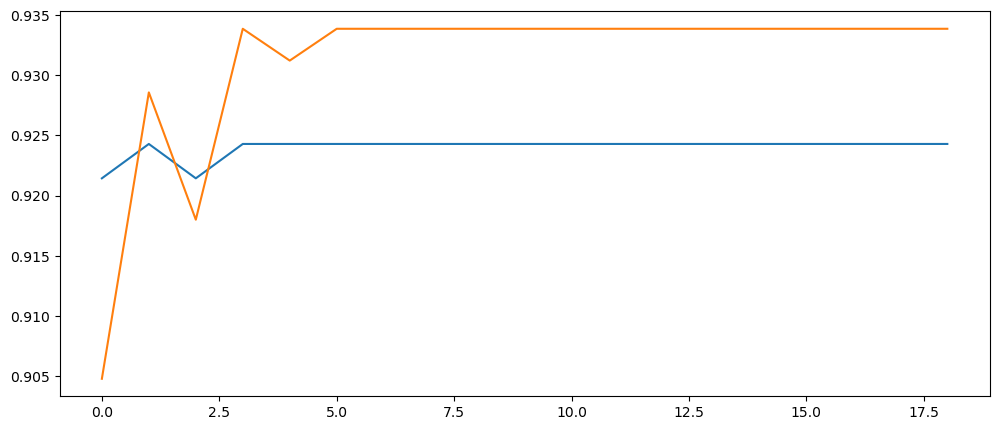

In [19]:
plt.figure(figsize=(12,5))
p = sns.lineplot(train_scores)
p = sns.lineplot(test_scores)

In [20]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(6)

knn.fit(x_train,y_train)
knn.score(x_test,y_test)

0.9338624338624338

In [21]:
#SVM
from sklearn.metrics import accuracy_score
from sklearn import svm
model_3=svm.SVC(kernel='poly').fit(x_train,y_train)
predict=model_3.predict(x_test)
print(accuracy_score(y_test,predict)*100)

92.06349206349206


In [22]:
#random forest
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,max_depth=20,random_state=42)
rf.fit(x_train,y_train)
score=rf.score(x_train,y_train)
score2=rf.score(x_test,y_test)
print('Training Set Accuracy:','%.2f'%(score))
print('Test Set Accuracy:','%.2f'%(score2))

Training Set Accuracy: 0.93
Test Set Accuracy: 0.92


In [23]:
#ADDING ICC RANKINGS
#THE TEAM WHICH IS POSITIONED HIGHER ON THE ICC RANKING WILL BE CONSIDERED 'FAVOURITE' FOR THE MATCH
# THEREFORE WILL BE POSITIONED UNDER THE 'TEAM_1' COLOUMN
#LOADING NEW DATASETS
ranking=pd.read_csv(r"C:\Users\Soumadeep\Desktop\WORLD CUP PREDICTION\ICC RANKINGS.csv")
fixtures=pd.read_csv(r"C:\Users\Soumadeep\Desktop\WORLD CUP PREDICTION\World-Cup-2023-Schedule.csv")


In [24]:
ranking.head()

,POSITION,TEAM,POINTS,RATING
0,1,AUSTRALIA,2714.0,118.0
1,2,PAKISTAN,2316.0,116.0
2,3,INDIA,2086.0,115.0
3,4,NEWZELAND,2426.0,104.0
4,5,ENGLAND,1910.0,101.0


In [25]:
fixtures.head()

,Date,Team_1,Team_2,first_position,second_position
0,5-Oct,England,New Zealand,5.0,4.0
1,6-Oct,Pakistan,Sri Lanka,2.0,9.0
2,7-Oct,Bangladesh,Afghanistan,7.0,8.0
3,7-Oct,South Africa,Netherland,6.0,14.0
4,8-Oct,India,Australia,3.0,1.0


In [26]:
#LIST FOR STORING THE GROUP STAGE GAMES
pred_set_1=[]

In [27]:
# We only need the group stage games, so we have to slice the dataset
fixtures = fixtures.iloc[:45, :]
fixtures.tail()

,Date,Team_1,Team_2,first_position,second_position
40,9-Nov,New Zealand,Netherland,4.0,14.0
41,10-Nov,South Africa,Afghanistan,6.0,8.0
42,11-Nov,India,Sri Lanka,3.0,9.0
43,12-Nov,Australia,Bangladesh,1.0,7.0
44,12-Nov,England,Pakistan,5.0,2.0


In [28]:
#loop to add teams to new prediction dataset based on the ranking position of the each team
for index,row in fixtures.iterrows():
    if row['first_position']<row['second_position']:
        pred_set_1.append({'Team_1':row['Team_1'],'Team_2':row['Team_2'],'winning_team':None})
    else:
        pred_set_1.append({'Team_1':row['Team_2'],'Team_2':row['Team_1'],'winning_team':None})
pred_set_1=pd.DataFrame(pred_set_1)
backup_pred_set_1=pred_set_1
pred_set_1.head()

,Team_1,Team_2,winning_team
0,New Zealand,England,None
1,Pakistan,Sri Lanka,None
2,Bangladesh,Afghanistan,None
3,South Africa,Netherland,None
4,Australia,India,None


In [29]:
#GET DUMMY VARIABLES & DROP WINNING_TEAM COLOUMN
pred_set_1=pd.get_dummies(pred_set_1,prefix=['Team_1','Team_2'],columns=['Team_1','Team_2'])
#ADD MISSING COLOUMNS COMPARED TO THE MODEL'S TRAINING DATASET
missing_cols=set(final.columns)-set(pred_set_1.columns)
for c in missing_cols:
    pred_set_1[c]=0
pred_set_1=pred_set_1[final.columns]
pred_set_1.head()


,CATEGORY_OF_WINNER,TEAM_1_Afganisthan,TEAM_1_Australia,TEAM_1_Bangladesh,TEAM_1_England,TEAM_1_Hong Kong,TEAM_1_India,TEAM_1_Ireland,TEAM_1_Nepal,TEAM_1_Netherlands,...,TEAM_2_Oman,TEAM_2_Pakistan,TEAM_2_Scotland,TEAM_2_South Africa,TEAM_2_Sri Lanka,TEAM_2_UAE,TEAM_2_USA,TEAM_2_West Indies,TEAM_2_Zimbabwe,TEAM_2_england
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
pred_set_1=pred_set_1.drop(['CATEGORY_OF_WINNER'],axis=1)
pred_set_1.head()

,TEAM_1_Afganisthan,TEAM_1_Australia,TEAM_1_Bangladesh,TEAM_1_England,TEAM_1_Hong Kong,TEAM_1_India,TEAM_1_Ireland,TEAM_1_Nepal,TEAM_1_Netherlands,TEAM_1_NewZeland,...,TEAM_2_Oman,TEAM_2_Pakistan,TEAM_2_Scotland,TEAM_2_South Africa,TEAM_2_Sri Lanka,TEAM_2_UAE,TEAM_2_USA,TEAM_2_West Indies,TEAM_2_Zimbabwe,TEAM_2_england
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
# ROUND ROBIN FORMAT MATCHES PREDICTION USING random forest
predictions=rf.predict(pred_set_1)
for i in range(fixtures.shape[0]):
    print(backup_pred_set_1.iloc[i,1] + ' and ' + backup_pred_set_1.iloc[i,0])
    if predictions[i]==1:
        print('Winner:'+backup_pred_set_1.iloc[i,1])
    else:
        print('Winner:'+backup_pred_set_1.iloc[i,0])
    print('')

England and New Zealand
Winner:New Zealand

Sri Lanka and Pakistan
Winner:Pakistan

Afghanistan and Bangladesh
Winner:Bangladesh

Netherland and South Africa
Winner:South Africa

India and Australia
Winner:Australia

Sri Lanka and New Zealand
Winner:New Zealand

Bangladesh and England
Winner:England

Afghanistan and India
Winner:India

Netherland and Pakistan
Winner:Pakistan

South Africa and Australia
Winner:Australia

Bangladesh and New Zealand
Winner:New Zealand

Afghanistan and England
Winner:England

India and Pakistan
Winner:Pakistan

Netherland and Australia
Winner:Australia

Sri Lanka and South Africa
Winner:South Africa

Afghanistan and New Zealand
Winner:New Zealand

Bangladesh and India
Winner:India

Pakistan and Australia
Winner:Australia

Netherland and Sri Lanka
Winner:Sri Lanka

South Africa and England
Winner:England

New Zealand and India
Winner:India

Afghanistan and Pakistan
Winner:Pakistan

Bangladesh and South Africa
Winner:South Africa

Sri Lanka and Australia
Win

In [42]:
# CREATING SEPERATE RANKING DATA FRAME FOR SEMI FINAL TEAMS
semi_final_data={'POSITION':[1,2,3,4],'TEAM':['Australia','Pakistan','India','New Zeland'],'POINTS':[2714,2316,2086,2426],'RATING':[118,116,115,104]}
semi_final_df=pd.DataFrame(semi_final_data)
semi_final_df.head()

,POSITION,TEAM,POINTS,RATING
0,1,Australia,2714,118
1,2,Pakistan,2316,116
2,3,India,2086,115
3,4,New Zeland,2426,104


In [44]:
# CREATING SEPERATE FIXTURE DATA FRAME FOR SEMI-FINAL GAMES
semi_final_fixtures={'Team_1':['Australia','Pakistan'],'Team_2':['New Zeland','India'],'first_position':[1,2],'second_position':[4,3]}
semi_final_fixtures_df=pd.DataFrame(semi_final_fixtures)
semi_final_fixtures_df.head()

,Team_1,Team_2,first_position,second_position
0,Australia,New Zeland,1,4
1,Pakistan,India,2,3


In [45]:
#LIST FOR STORING SEMI-FINAL GAMES
pred_set_2=[]

In [46]:
#loop to add teams to new prediction dataset based on the ranking position of the each team
for index_1,row_1 in semi_final_fixtures_df.iterrows():
    if row_1['first_position']<row_1['second_position']:
        pred_set_2.append({'Team_1':row_1['Team_1'],'Team_2':row_1['Team_2'],'winning_team':None})
    else:
        pred_set_2.append({'Team_1':row_1['Team_2'],'Team_2':row_1['Team_1'],'winning_team':None})
pred_set_2=pd.DataFrame(pred_set_2)
backup_pred_set_2=pred_set_2
pred_set_2.head()

,Team_1,Team_2,winning_team
0,Australia,New Zeland,None
1,Pakistan,India,None


In [47]:
#GET DUMMY VARIABLES & DROP WINNING_TEAM COLOUMN
pred_set_2=pd.get_dummies(pred_set_2,prefix=['Team_1','Team_2'],columns=['Team_1','Team_2'])
#ADD MISSING COLOUMNS COMPARED TO THE MODEL'S TRAINING DATASET
missing_cols=set(final.columns)-set(pred_set_2.columns)
for c in missing_cols:
    pred_set_2[c]=0
pred_set_2=pred_set_2[final.columns]
pred_set_2.head()

,CATEGORY_OF_WINNER,TEAM_1_Afganisthan,TEAM_1_Australia,TEAM_1_Bangladesh,TEAM_1_England,TEAM_1_Hong Kong,TEAM_1_India,TEAM_1_Ireland,TEAM_1_Nepal,TEAM_1_Netherlands,...,TEAM_2_Oman,TEAM_2_Pakistan,TEAM_2_Scotland,TEAM_2_South Africa,TEAM_2_Sri Lanka,TEAM_2_UAE,TEAM_2_USA,TEAM_2_West Indies,TEAM_2_Zimbabwe,TEAM_2_england
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
pred_set_2=pred_set_2.drop(['CATEGORY_OF_WINNER'],axis=1)
pred_set_2.head()

,TEAM_1_Afganisthan,TEAM_1_Australia,TEAM_1_Bangladesh,TEAM_1_England,TEAM_1_Hong Kong,TEAM_1_India,TEAM_1_Ireland,TEAM_1_Nepal,TEAM_1_Netherlands,TEAM_1_NewZeland,...,TEAM_2_Oman,TEAM_2_Pakistan,TEAM_2_Scotland,TEAM_2_South Africa,TEAM_2_Sri Lanka,TEAM_2_UAE,TEAM_2_USA,TEAM_2_West Indies,TEAM_2_Zimbabwe,TEAM_2_england
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
# SEMI FINAL MATCHES PREDICTION USING RANDOM FOREST
predictions=rf.predict(pred_set_2)
for i in range(semi_final_fixtures_df.shape[0]):
    print(backup_pred_set_2.iloc[i,1] + ' and ' + backup_pred_set_2.iloc[i,0])
    if predictions[i]==1:
        print('Winner:'+backup_pred_set_2.iloc[i,1])
    else:
        print('Winner:'+backup_pred_set_2.iloc[i,0])
    print('')

New Zeland and Australia
Winner:Australia

India and Pakistan
Winner:Pakistan



In [50]:
# CREATING SEPERATE RANKING DATA FRAME FOR FINAL GAME
final_ranking={'POSITION':[1,2],'TEAM':['Australia','Pakistan'],'POINTS':[2714,2316],'RATING':[118,116]}
final_ranking_df=pd.DataFrame(final_ranking)
final_ranking_df.head()

,POSITION,TEAM,POINTS,RATING
0,1,Australia,2714,118
1,2,Pakistan,2316,116


In [52]:
# CREATING SEPERATE FIXTURE DATA FRAME FOR THE FINAL GAME
final_fixture={'Team_1':['Australia'],'Team_2':['Pakistan'],'first_position': [1],'second_position': [2]}
final_fixture_df=pd.DataFrame(final_fixture)
final_fixture_df.head()

,Team_1,Team_2,first_position,second_position
0,Australia,Pakistan,1,2


In [53]:
#LIST FOR STORING FINAL GAME
pred_set_3=[]

In [54]:
#loop to add teams to new prediction dataset based on the ranking position of the each team
for index_2,row_2 in final_fixture_df.iterrows():
    if row_2['first_position']<row_2['second_position']:
        pred_set_3.append({'Team_1':row_2['Team_1'],'Team_2':row_2['Team_2'],'winning_team':None})
    else:
        pred_set_3.append({'Team_1':row_2['Team_2'],'Team_2':row_2['Team_1'],'winning_team':None})
pred_set_3=pd.DataFrame(pred_set_3)
backup_pred_set_3=pred_set_3
pred_set_3.head()

,Team_1,Team_2,winning_team
0,Australia,Pakistan,None


In [55]:
#GET DUMMY VARIABLES & DROP WINNING_TEAM COLOUMN
pred_set_3=pd.get_dummies(pred_set_3,prefix=['Team_1','Team_2'],columns=['Team_1','Team_2'])
#ADD MISSING COLOUMNS COMPARED TO THE MODEL'S TRAINING DATASET
missing_cols=set(final.columns)-set(pred_set_3.columns)
for c in missing_cols:
    pred_set_3[c]=0
pred_set_3=pred_set_3[final.columns]
pred_set_3.head()

,CATEGORY_OF_WINNER,TEAM_1_Afganisthan,TEAM_1_Australia,TEAM_1_Bangladesh,TEAM_1_England,TEAM_1_Hong Kong,TEAM_1_India,TEAM_1_Ireland,TEAM_1_Nepal,TEAM_1_Netherlands,...,TEAM_2_Oman,TEAM_2_Pakistan,TEAM_2_Scotland,TEAM_2_South Africa,TEAM_2_Sri Lanka,TEAM_2_UAE,TEAM_2_USA,TEAM_2_West Indies,TEAM_2_Zimbabwe,TEAM_2_england
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
pred_set_3=pred_set_3.drop(['CATEGORY_OF_WINNER'],axis=1)

#  FINAL MATCHE PREDICTION USING RANDOM FOREST
final_prediction=rf.predict(pred_set_3)
for i in range(final_fixture_df.shape[0]):
    print(backup_pred_set_3.iloc[i,1] + ' and ' + backup_pred_set_3.iloc[i,0])
    if final_prediction[i]==1:
        print('Winner:'+backup_pred_set_3.iloc[i,1])
    else:
        print('Winner:'+backup_pred_set_3.iloc[i,0])
    print('')

Pakistan and Australia
Winner:Australia



 FROM OUR RANDOM FOREST MODEL WE CAN SAY THAT THIS MODEL PREDICT AUSTRALIA AS AN UPCOMING ICC CRICKET WORLD CUP 2023 WINNER FOR THE RECORD 6 TIMES
 
 THIS MODEL HAS TRAINING ACCURACY 93% & TESTING ACCURACY 92%
 
 I,MYSELF CREATED ALL THE DATASETS USED HERE TAKING DATA FROM DIFFERENT WEBSITES & COMBINE THEM ALL TO CREATE SUITABLE DATASET NECESSARY FOR THIS WORK . 
 
 I SPECIALLY THANK MR.SANDEEP BANARJEE FOR SUPERVISING THE WHOLE WORK & HELPING ME IN SO MANY NUMBER OF TIMES ...
 
 ALSO THANK MR.BIBEK NASKAR FOR HIS CONTINUOUS SUPPORT DESPITE OF HIS MEDICAL ISSUES WHICH ENCOURAGE ME ALOT . 
 
 THERE IS SO MANY FACTORS RESPONSIBILE FOR GETTING A WINNER FROM A CRICKET MATCH BUT WE CANT TAKE INTO ACCOUNT OF THOSE HERE .
 
 SO THERE WILL BE HIGH PROBABILITY OF NOT MATCHING REAL LIFE RESULTS.
 
 THATS IT . ONCE AGAIN , THANK YOU EVERY ONE !!! 